<a href="https://colab.research.google.com/github/VaibhavBhusawale/-Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project_(Shaloy%2C_Smriti%2C_Vaibhav).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Hypothesis for the problem:**

1. The number of bikes rented during rainfall/snowfall reduces.
2. The number of bikes rented increases during peak hours.
3. The number of bikes rented during weekends is less compared to weekdays.
4. The number of bikes rented on holidays is less compared to that of working days.
5. The number of bikes rented reduces if there is high humidity.
6. The number of bikes rented on days with high solar radiations is low.
7. The number of bikes rented on average in summer is higher compared to other seasons.

# **Data Warehousing:**

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
from datetime import timedelta
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing data

path = '/content/drive/MyDrive/Bike sharing demand prediction - Shaloy Lewis/Copy of SeoulBikeData.csv'

df = pd.read_csv(path, encoding='iso-8859-1')

In [ ]:
# Basic inspection

df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# updating the attribute names

df = df.rename(columns= {'Date':'date','Rented Bike Count': 'rented_bike_count', 'Hour':'hour',
                    'Temperature(°C)':'temp', 'Humidity(%)':'humidity',
                    'Wind speed (m/s)': 'wind_speed', 'Visibility (10m)': 'visibility',
                    'Dew point temperature(°C)':'dew_point_temp',
                    'Solar Radiation (MJ/m2)': 'solar_radiation', 'Rainfall(mm)': 'rainfall',
                    'Snowfall (cm)':'snowfall', 'Seasons':'seasons',
                    'Holiday':'holiday', 'Functioning Day':'func_day'})

In [ ]:
df.head()

,date,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,func_day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.shape

(8760, 14)

Checking the missing values:

In [ ]:
df.isnull().sum()

date                 0
rented_bike_count    0
hour                 0
temp                 0
humidity             0
wind_speed           0
visibility           0
dew_point_temp       0
solar_radiation      0
rainfall             0
snowfall             0
seasons              0
holiday              0
func_day             0
dtype: int64

The are no missing values.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               8760 non-null   object 
 1   rented_bike_count  8760 non-null   int64  
 2   hour               8760 non-null   int64  
 3   temp               8760 non-null   float64
 4   humidity           8760 non-null   int64  
 5   wind_speed         8760 non-null   float64
 6   visibility         8760 non-null   int64  
 7   dew_point_temp     8760 non-null   float64
 8   solar_radiation    8760 non-null   float64
 9   rainfall           8760 non-null   float64
 10  snowfall           8760 non-null   float64
 11  seasons            8760 non-null   object 
 12  holiday            8760 non-null   object 
 13  func_day           8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ KB


In [ ]:
df.describe()

,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
df.describe().shape

(8, 10)

# **Visual Inspection:**

In [ ]:
# converting date column from string to datetime features

df['date'] = pd.to_datetime(df.date)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               8760 non-null   datetime64[ns]
 1   rented_bike_count  8760 non-null   int64         
 2   hour               8760 non-null   int64         
 3   temp               8760 non-null   float64       
 4   humidity           8760 non-null   int64         
 5   wind_speed         8760 non-null   float64       
 6   visibility         8760 non-null   int64         
 7   dew_point_temp     8760 non-null   float64       
 8   solar_radiation    8760 non-null   float64       
 9   rainfall           8760 non-null   float64       
 10  snowfall           8760 non-null   float64       
 11  seasons            8760 non-null   object        
 12  holiday            8760 non-null   object        
 13  func_day           8760 non-null   object        
dtypes: datet

The date column is converted to datetime datatype

In [ ]:
# creating a new attribute 'month'

df['month'] = pd.DatetimeIndex(df['date']).month

In [ ]:
# unique entries in month

df.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

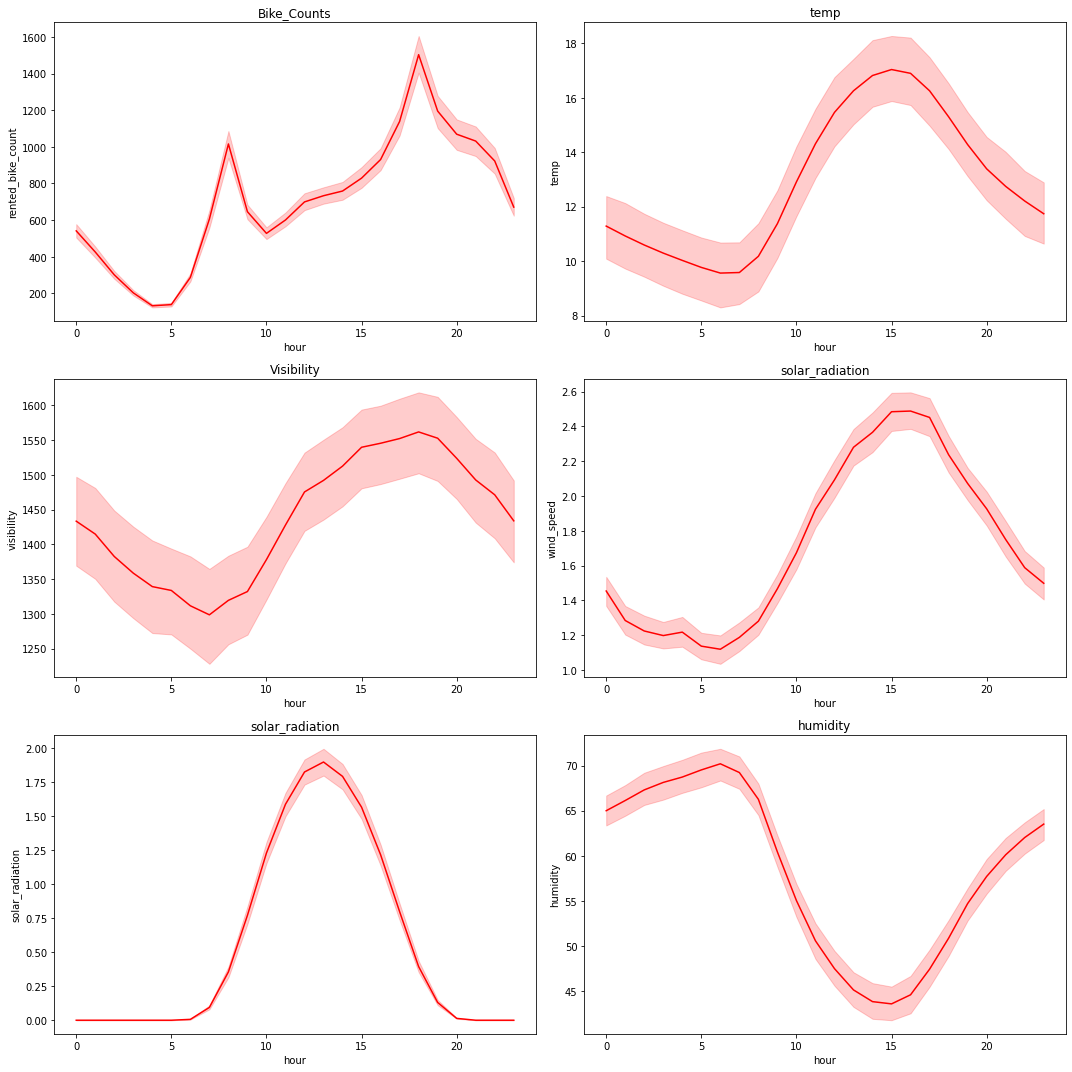

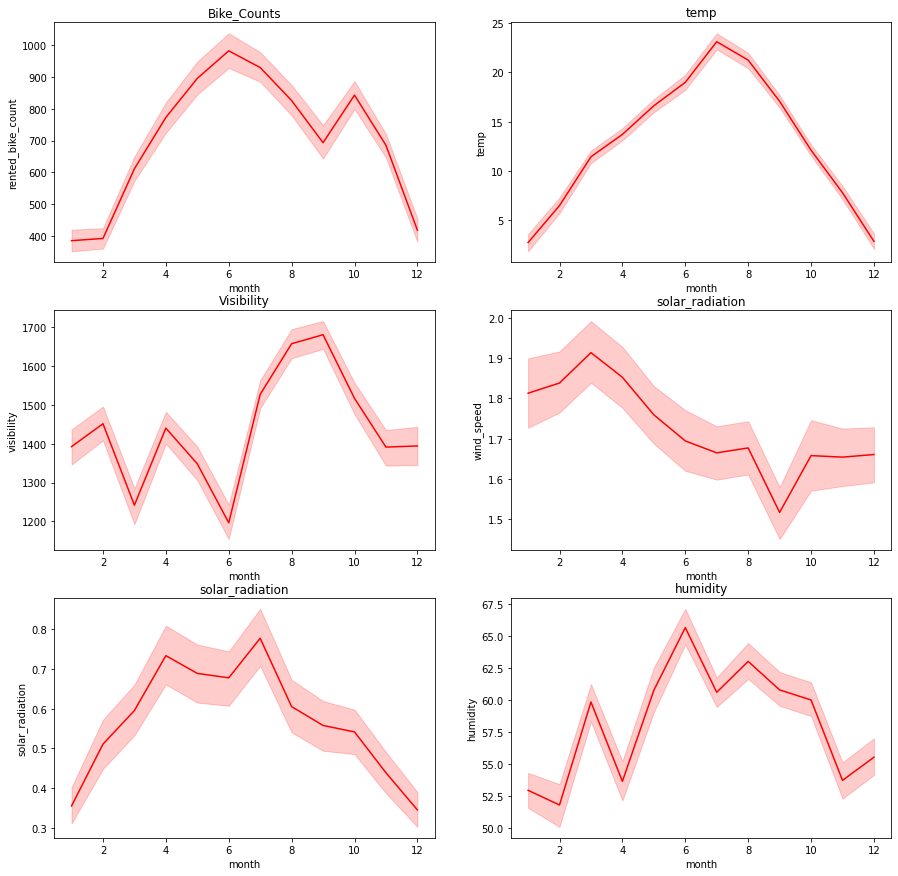

In [ ]:
y= [['rented_bike_count', 'temp'], ['visibility', 'wind_speed'], ['solar_radiation', 'humidity']]
title = [['Bike_Counts', 'temp'], ['Visibility', 'solar_radiation'], 
         ['solar_radiation', 'humidity']]

f, ax = plt.subplots(3,2,figsize=(15,15))

for i in range(3):
    for j in range(2):
        sns.lineplot(data=df, x='hour', y=y[i][j], ax=ax[i][j], color='r')
        ax[i][j].set_title(title[i][j])



plt.tight_layout()

m = [['rented_bike_count', 'temp'], ['visibility', 'wind_speed'], ['solar_radiation', 'humidity']]
title = [['Bike_Counts', 'temp'], ['Visibility', 'solar_radiation'], 
         ['solar_radiation', 'humidity']]

f, ax = plt.subplots(3,2,figsize=(15,15))

for i in range(3):
    for j in range(2):
        sns.lineplot(data=df, x='month', y=m[i][j], ax=ax[i][j], color='r')
        ax[i][j].set_title(title[i][j])


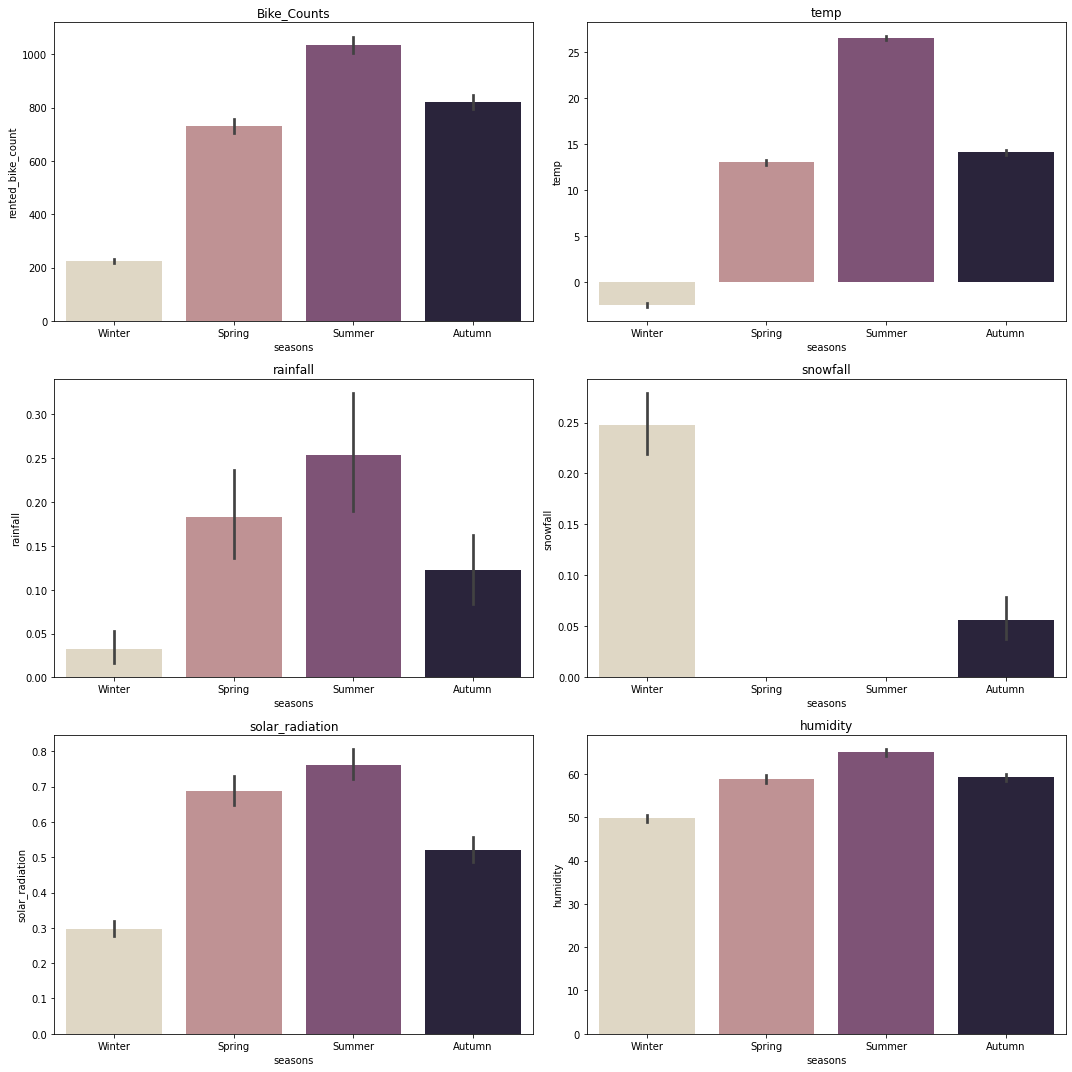

In [ ]:
s= [['rented_bike_count', 'temp'], ['rainfall', 'snowfall'], ['solar_radiation', 'humidity']]
title = [['Bike_Counts', 'temp'], ['rainfall', 'snowfall'], 
         ['solar_radiation', 'humidity']]

f, ax = plt.subplots(3,2,figsize=(15,15))

for i in range(3):
    for j in range(2):
        sns.barplot(data=df, x='seasons', y=s[i][j], ax=ax[i][j], color='r',palette='ch:s=-.2,r=.6')
        ax[i][j].set_title(title[i][j])

plt.tight_layout()  


The number of bikes rented in the months of December, January, and February is very less compared to that of other months.

There are very less number of bikes being rented in winter, and it is the highest in the summer.



In [ ]:
pd.pivot_table(df, index=['holiday', 'func_day'], columns='seasons', values='rented_bike_count',
               aggfunc=lambda x: len(x), margins=True, margins_name='TOTAL')

seasons              Autumn  Spring  Summer  Winter  TOTAL
holiday    func_day                                       
Holiday    No          24.0     NaN     NaN     NaN     24
           Yes         96.0    72.0    48.0   192.0    408
No Holiday No         223.0    48.0     NaN     NaN    271
           Yes       1841.0  2088.0  2160.0  1968.0   8057
TOTAL                2184.0  2208.0  2208.0  2160.0   8760

# **Feature engineering and selection:**

In [ ]:
df.head()

,date,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,func_day,month
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1


In [ ]:
df['func_day'].value_counts()

Yes    8465
No      295
Name: func_day, dtype: int64

In [ ]:
df['holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: holiday, dtype: int64

In [ ]:
df['seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: seasons, dtype: int64

In [ ]:
df.head()

,date,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,func_day,month
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1


# **EDA:**

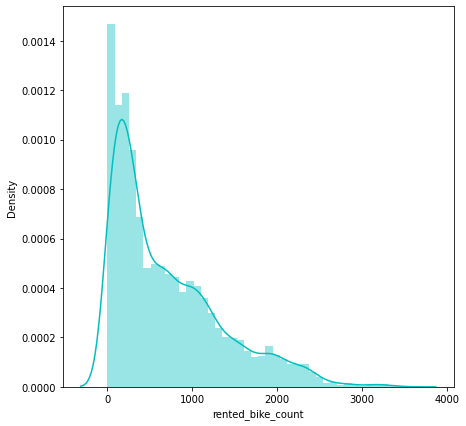

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(df['rented_bike_count'],color="c")

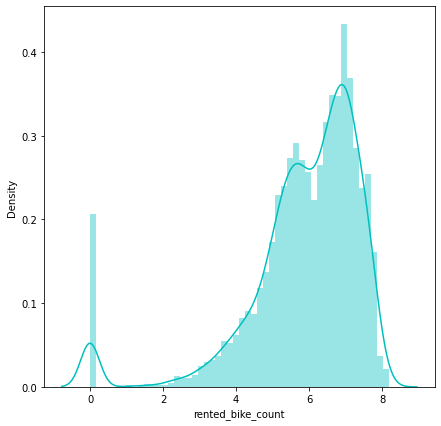

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(np.log(df['rented_bike_count']+1),color="c")

The log transformation gives us a left skewed distriution.

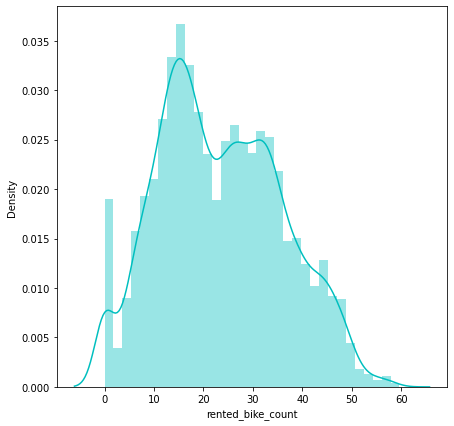

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(np.sqrt(df['rented_bike_count']),color="c")

The square root transformation on the dependent variable gives us distributio which is almost normal in nature.

In [ ]:
numeric_features = df.describe().columns
numeric_features

Index(['rented_bike_count', 'hour', 'temp', 'humidity', 'wind_speed',
       'visibility', 'dew_point_temp', 'solar_radiation', 'rainfall',
       'snowfall', 'month'],
      dtype='object')

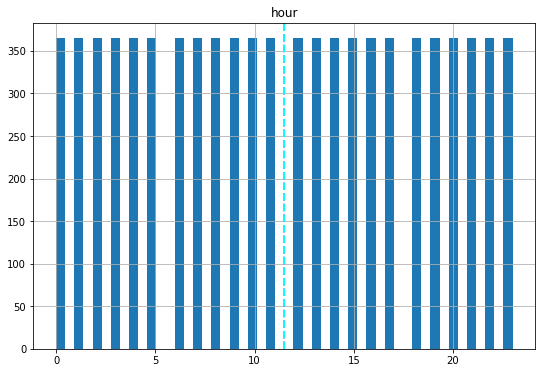

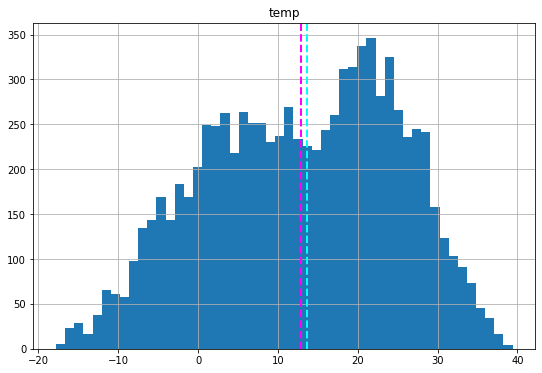

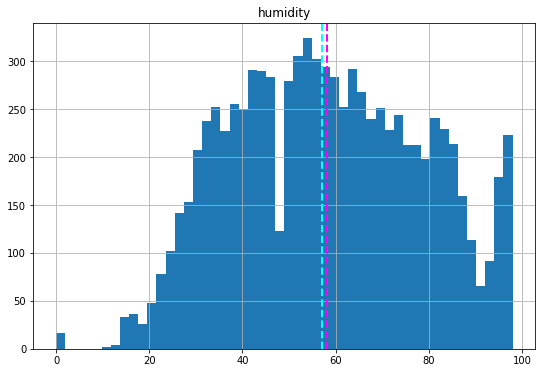

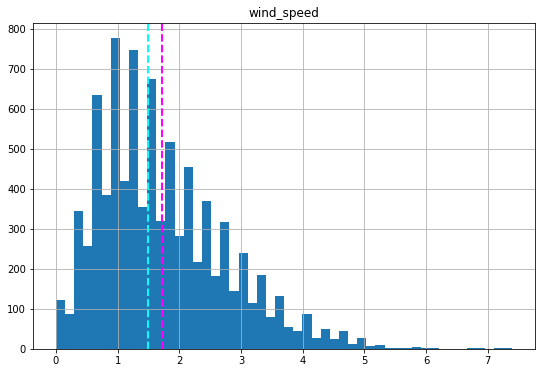

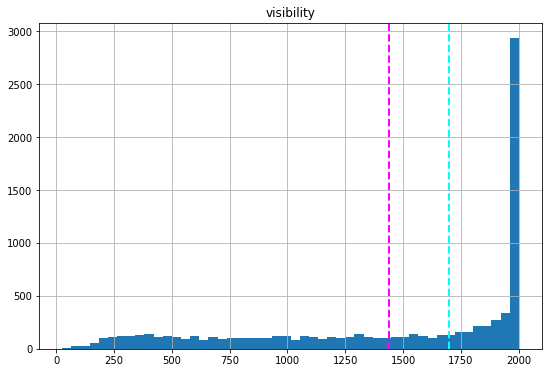

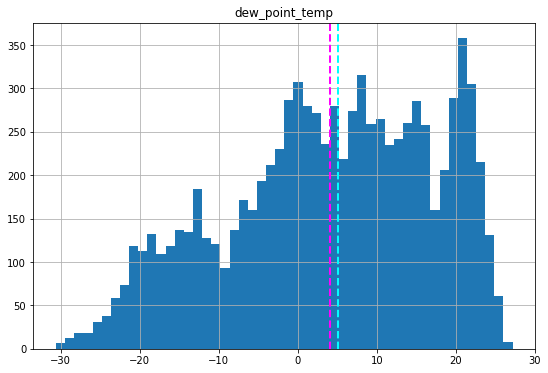

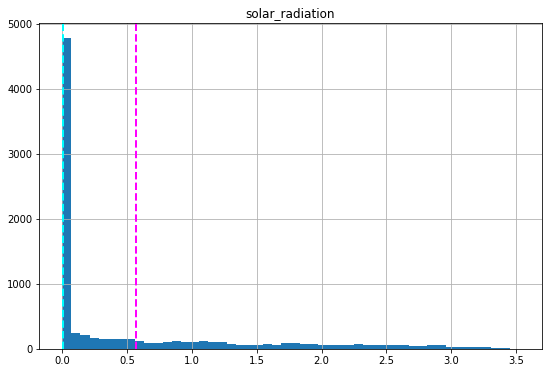

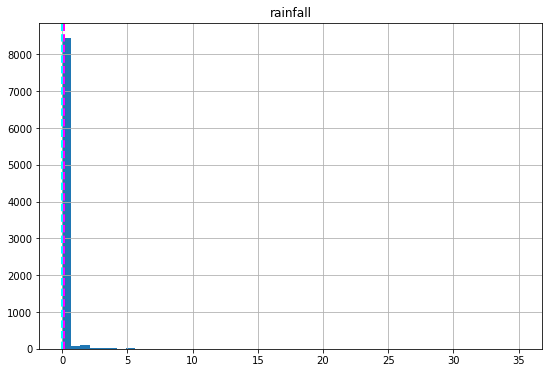

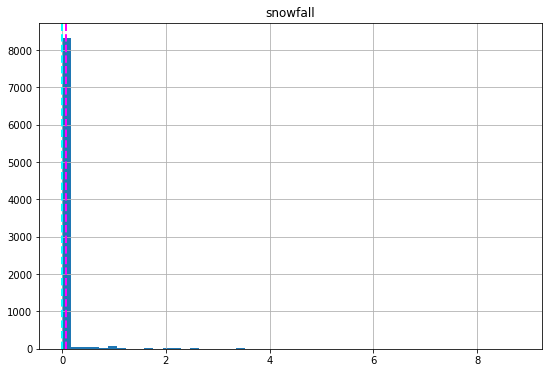

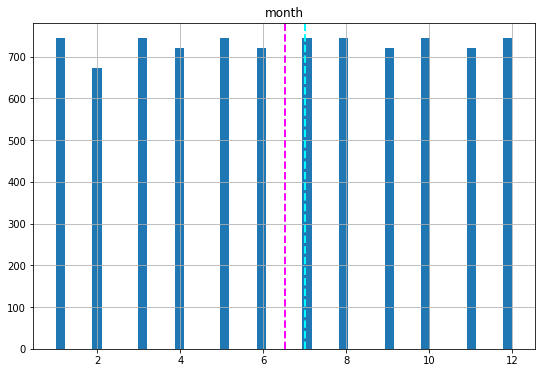

In [ ]:
# plot a bar plot for each numerical feature count (except car_ID)

for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

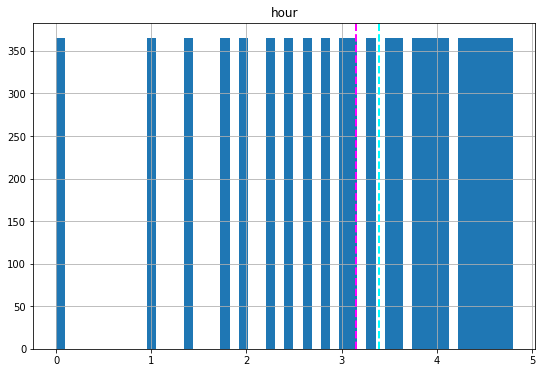

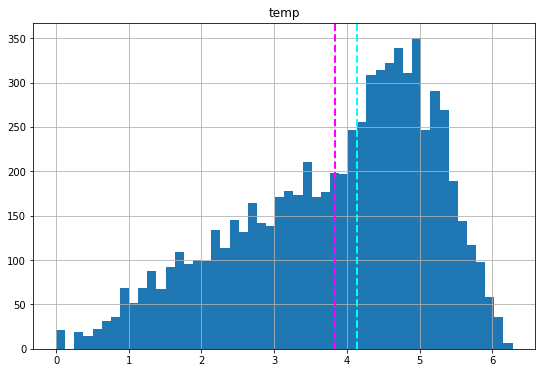

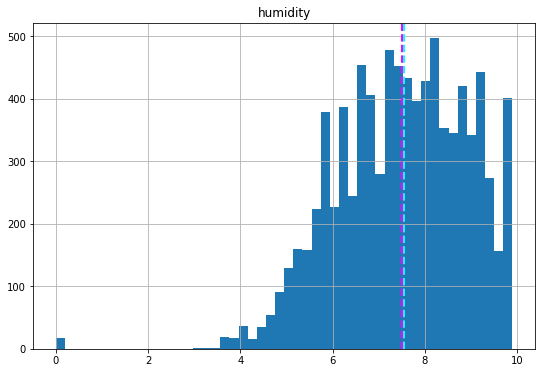

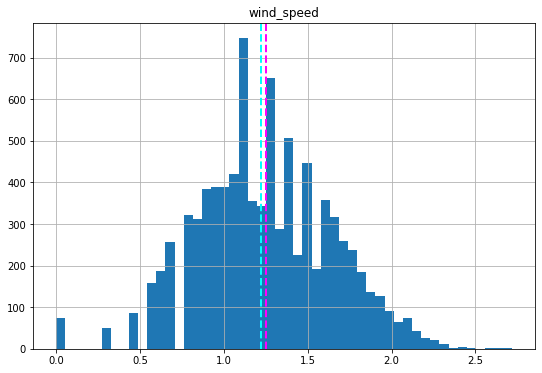

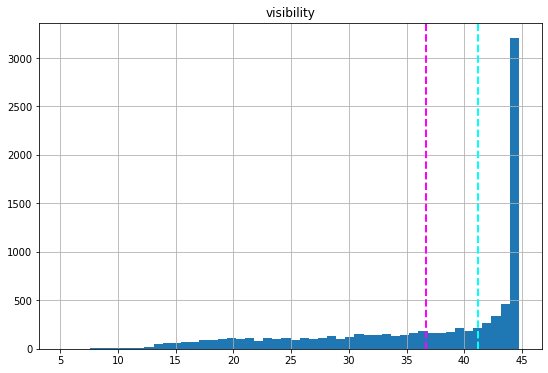

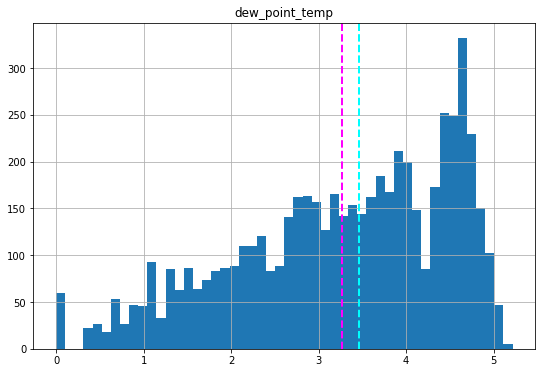

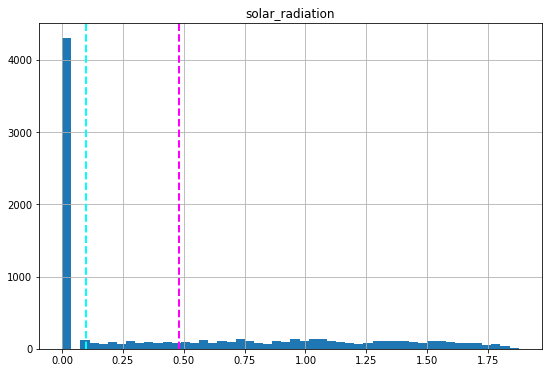

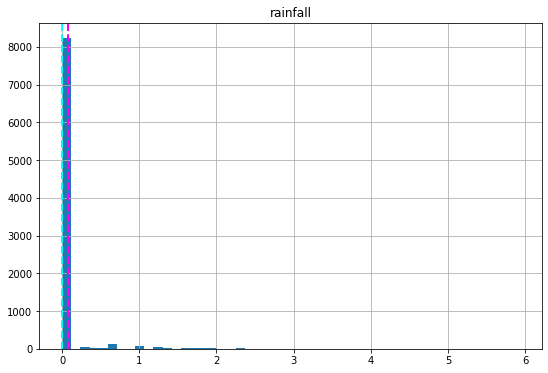

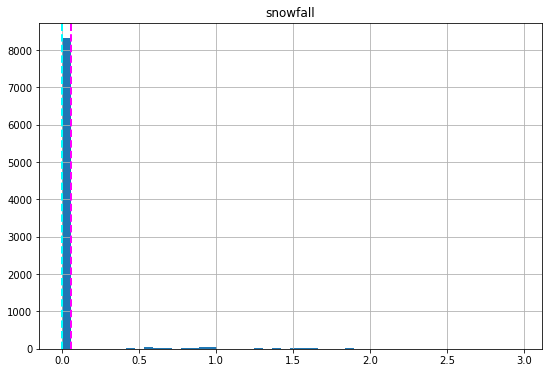

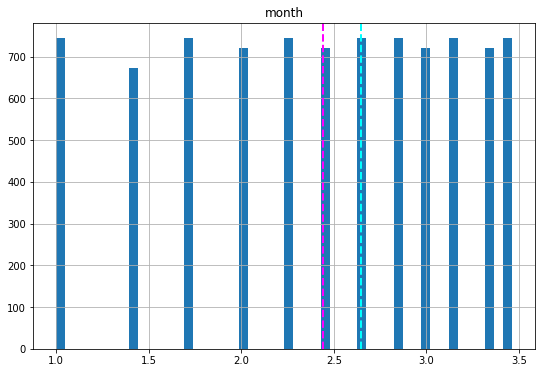

In [ ]:
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.sqrt(df[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

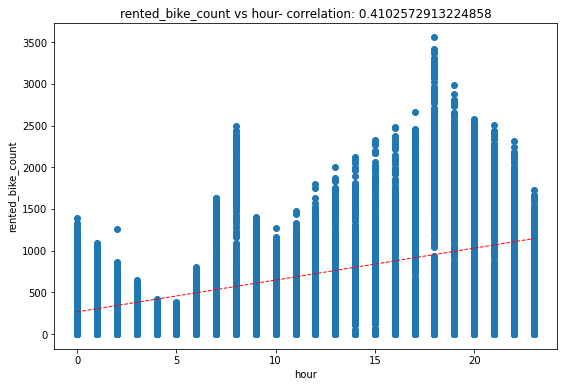

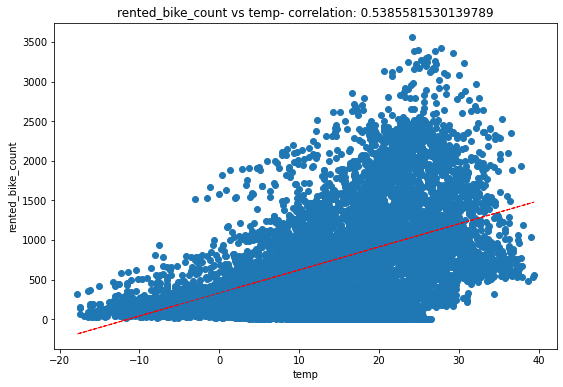

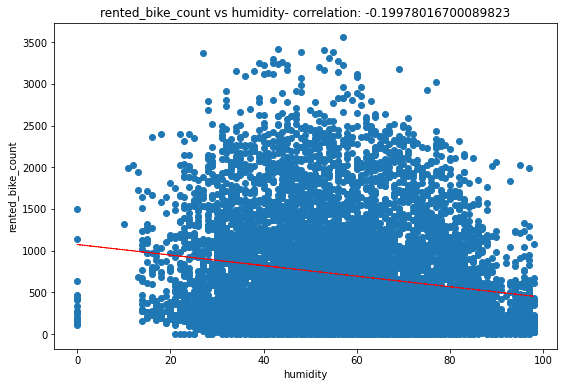

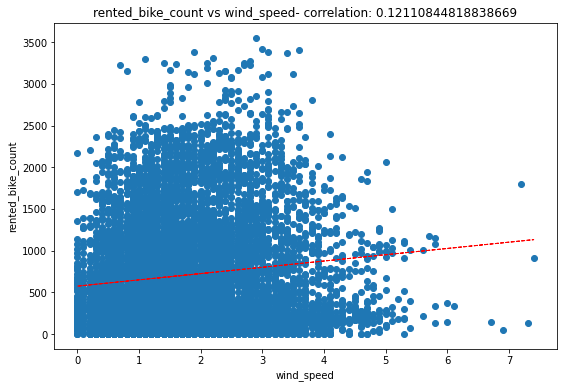

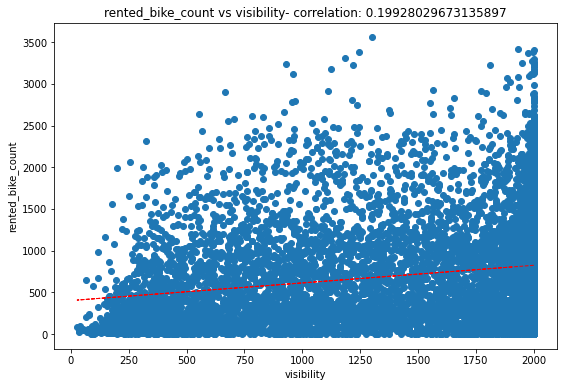

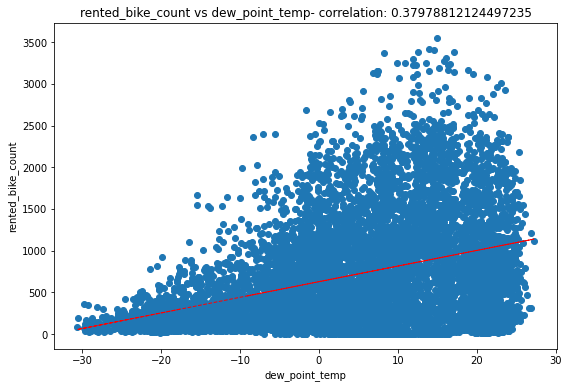

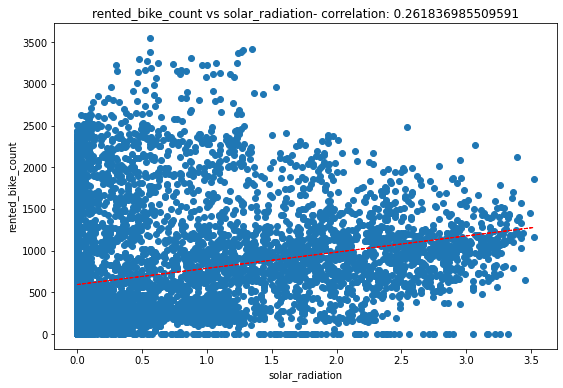

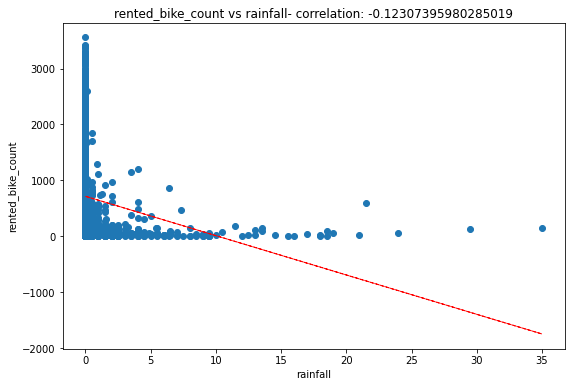

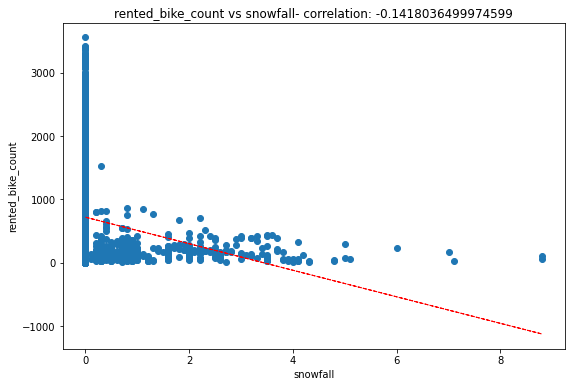

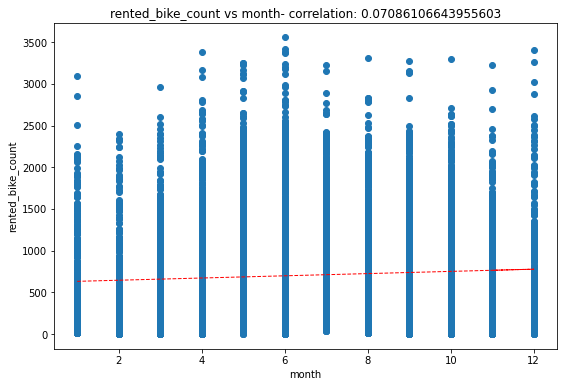

In [ ]:
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['rented_bike_count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('rented_bike_count')
    ax.set_title('rented_bike_count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['rented_bike_count'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

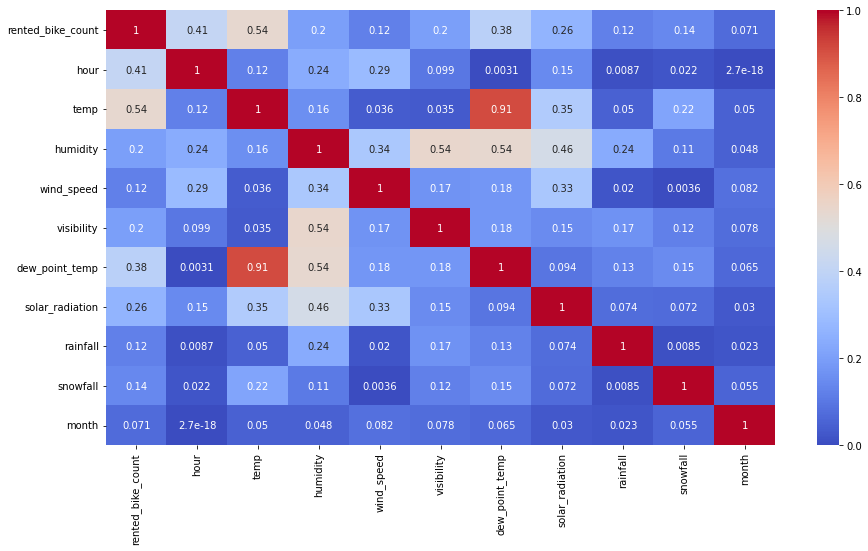

In [ ]:
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

The dew_point_temp, season_Summer, and season_Winter attributes show high correlation. Hence it can be dropped.

In [ ]:
df = df.drop(['dew_point_temp'], axis=1)

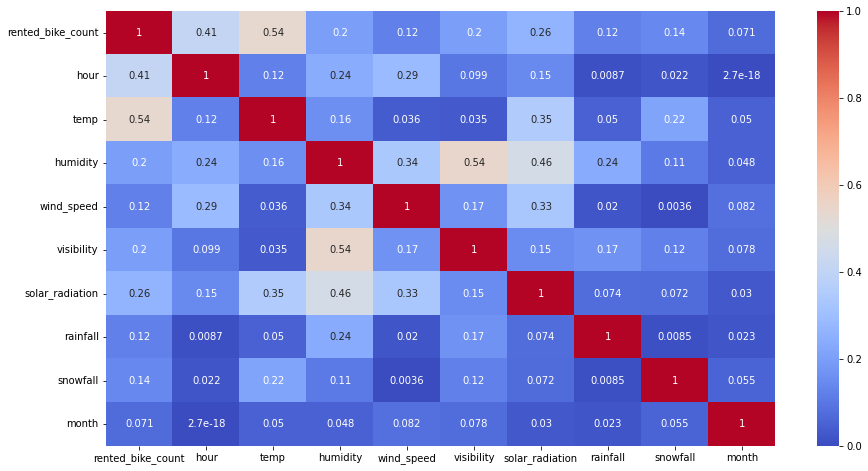

In [ ]:
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
df.head()

,date,rented_bike_count,hour,temp,humidity,wind_speed,visibility,solar_radiation,rainfall,snowfall,seasons,holiday,func_day,month
0,2017-01-12,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1


In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['date','rented_bike_count','hour','month']]])

,variables,VIF
0,temp,3.166007
1,humidity,4.758651
2,wind_speed,4.079926
3,visibility,4.409448
4,solar_radiation,2.246238
5,rainfall,1.078501
6,snowfall,1.118901


In [ ]:
numeric_features = ['temp','humidity','wind_speed','visibility','solar_radiation','rainfall','snowfall',]

In [ ]:
df.columns

Index(['date', 'rented_bike_count', 'hour', 'temp', 'humidity', 'wind_speed',
       'visibility', 'solar_radiation', 'rainfall', 'snowfall', 'seasons',
       'holiday', 'func_day', 'month'],
      dtype='object')

In [ ]:
categorical_features = ['date','month','hour','seasons','holiday','func_day']

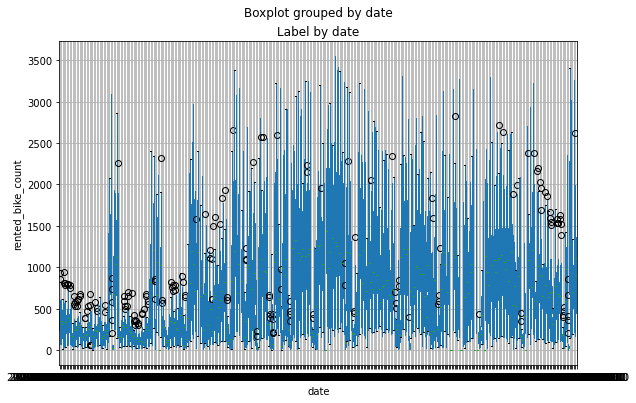

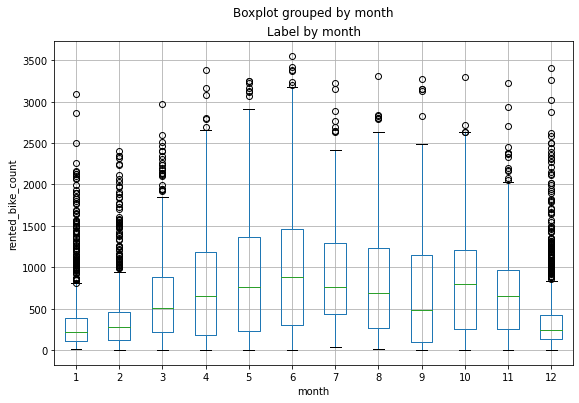

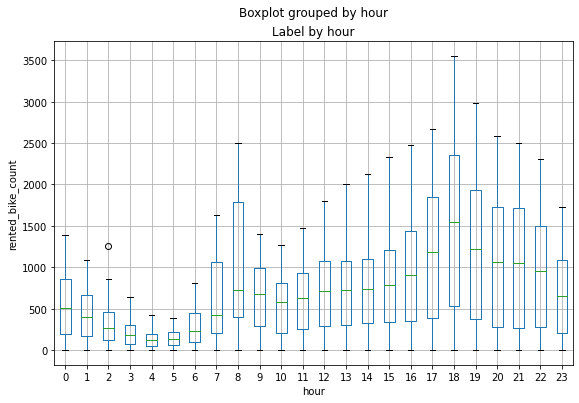

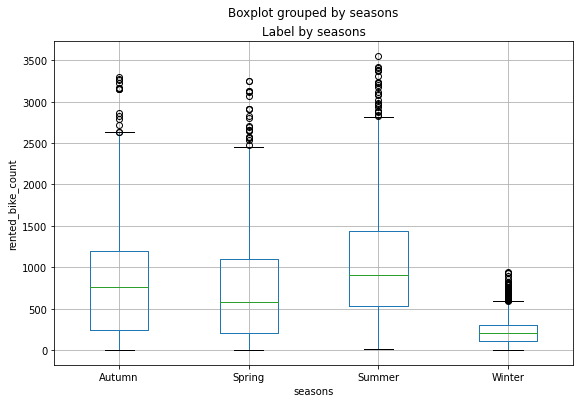

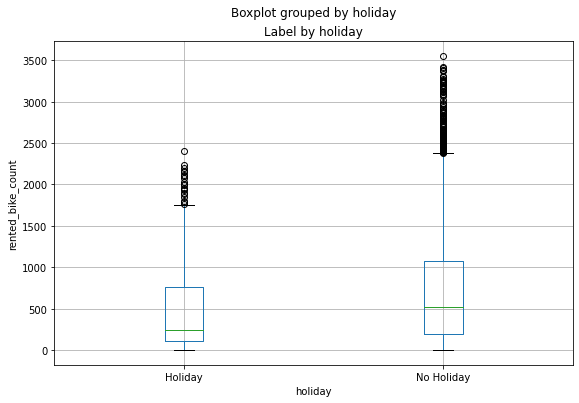

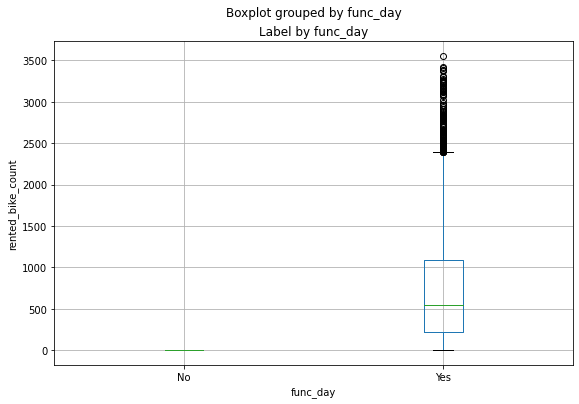

In [ ]:
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df.boxplot(column = 'rented_bike_count', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("rented_bike_count")
plt.show()

In [ ]:
df.head()

,date,rented_bike_count,hour,temp,humidity,wind_speed,visibility,solar_radiation,rainfall,snowfall,seasons,holiday,func_day,month
0,2017-01-12,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               8760 non-null   datetime64[ns]
 1   rented_bike_count  8760 non-null   int64         
 2   hour               8760 non-null   int64         
 3   temp               8760 non-null   float64       
 4   humidity           8760 non-null   int64         
 5   wind_speed         8760 non-null   float64       
 6   visibility         8760 non-null   int64         
 7   solar_radiation    8760 non-null   float64       
 8   rainfall           8760 non-null   float64       
 9   snowfall           8760 non-null   float64       
 10  seasons            8760 non-null   object        
 11  holiday            8760 non-null   object        
 12  func_day           8760 non-null   object        
 13  month              8760 non-null   int64         
dtypes: datet

In [ ]:
### Data encoding
#label encoding
encoders_nums = {"func_day":{"Yes":1,"No":0},
                 "holiday":{"Holiday":1,"No Holiday":0},
                 }

df = df.replace(encoders_nums)

In [ ]:
df.head()

,date,rented_bike_count,hour,temp,humidity,wind_speed,visibility,solar_radiation,rainfall,snowfall,seasons,holiday,func_day,month
0,2017-01-12,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,0,1,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,0,1,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,0,1,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,0,1,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,0,1,1


In [ ]:
df = pd.get_dummies(df, prefix=None, prefix_sep='_', dummy_na=False, columns=['seasons'], sparse=False, drop_first=False, dtype=None)
df.head()

,date,rented_bike_count,hour,temp,humidity,wind_speed,visibility,solar_radiation,rainfall,snowfall,holiday,func_day,month,seasons_Autumn,seasons_Spring,seasons_Summer,seasons_Winter
0,2017-01-12,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,1,1,0,0,0,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,1,1,0,0,0,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,1,0,0,0,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,1,1,0,0,0,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,1,1,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               8760 non-null   datetime64[ns]
 1   rented_bike_count  8760 non-null   int64         
 2   hour               8760 non-null   int64         
 3   temp               8760 non-null   float64       
 4   humidity           8760 non-null   int64         
 5   wind_speed         8760 non-null   float64       
 6   visibility         8760 non-null   int64         
 7   solar_radiation    8760 non-null   float64       
 8   rainfall           8760 non-null   float64       
 9   snowfall           8760 non-null   float64       
 10  holiday            8760 non-null   int64         
 11  func_day           8760 non-null   int64         
 12  month              8760 non-null   int64         
 13  seasons_Autumn     8760 non-null   uint8         
 14  seasons_

In [ ]:
numeric_features

['temp',
 'humidity',
 'wind_speed',
 'visibility',
 'solar_radiation',
 'rainfall',
 'snowfall']

In [ ]:
features = numeric_features.copy()
features.extend(['seasons_Winter','seasons_Summer','seasons_Spring','seasons_Autumn', 'month','hour'])
features

['temp',
 'humidity',
 'wind_speed',
 'visibility',
 'solar_radiation',
 'rainfall',
 'snowfall',
 'seasons_Winter',
 'seasons_Summer',
 'seasons_Spring',
 'seasons_Autumn',
 'month',
 'hour']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
df[features] = scaler.fit_transform(df[features])

In [ ]:
df.head()

,date,rented_bike_count,hour,temp,humidity,wind_speed,visibility,solar_radiation,rainfall,snowfall,holiday,func_day,month,seasons_Autumn,seasons_Spring,seasons_Summer,seasons_Winter
0,2017-01-12,254,0.000000,0.220280,0.377551,0.297297,1.0,0.0,0.0,0.0,0,1,0.0,0.0,0.0,0.0,1.0
1,2017-01-12,204,0.043478,0.215035,0.387755,0.108108,1.0,0.0,0.0,0.0,0,1,0.0,0.0,0.0,0.0,1.0
2,2017-01-12,173,0.086957,0.206294,0.397959,0.135135,1.0,0.0,0.0,0.0,0,1,0.0,0.0,0.0,0.0,1.0
3,2017-01-12,107,0.130435,0.202797,0.408163,0.121622,1.0,0.0,0.0,0.0,0,1,0.0,0.0,0.0,0.0,1.0
4,2017-01-12,78,0.173913,0.206294,0.367347,0.310811,1.0,0.0,0.0,0.0,0,1,0.0,0.0,0.0,0.0,1.0


In [ ]:
y = np.log10(dataset_pr['price'])

In [ ]:
##############################################################################

In [ ]:
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
numerical_features = df[['rented_bike_count','temp','wind_speed','humidity','visibility','solar_radiation','hour','month']]

In [ ]:
categorical_variables = df[['rainfall','snowfall','seasons_Autumn','seasons_Spring','holiday_Holiday','func_day_Yes']]

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
df.columns

Index(['date', 'rented_bike_count', 'hour', 'temp', 'humidity', 'wind_speed',
       'visibility', 'solar_radiation', 'rainfall', 'snowfall', 'month',
       'seasons_Autumn', 'seasons_Spring', 'holiday_Holiday', 'func_day_Yes'],
      dtype='object')

In [ ]:
calc_vif(numerical_features[[i for i in .describe().columns if i not in ['rented_bike_count','date']]])

,variables,VIF
0,hour,4.164134
1,temp,3.608378
2,humidity,13.390331
3,wind_speed,4.788142
4,visibility,7.402047
5,solar_radiation,2.493562
6,rainfall,1.265709
7,snowfall,1.270314
8,month,5.291223
9,seasons_Autumn,1.758967


In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['rented_bike_count','date','func_day_Yes','humidity']]])

,variables,VIF
0,hour,3.949360
1,temp,2.746700
2,wind_speed,4.585026
3,visibility,5.384101
4,solar_radiation,1.936480
5,rainfall,1.143481
6,snowfall,1.177716
7,month,4.234447
8,seasons_Autumn,1.671832
9,seasons_Spring,1.431752


In [ ]:
###################################################

In [ ]:
df.columns

Index(['date', 'rented_bike_count', 'hour', 'temp', 'humidity', 'wind_speed',
       'visibility', 'solar_radiation', 'rainfall', 'snowfall', 'month',
       'seasons_Autumn', 'seasons_Spring', 'holiday_Holiday', 'func_day_Yes'],
      dtype='object')

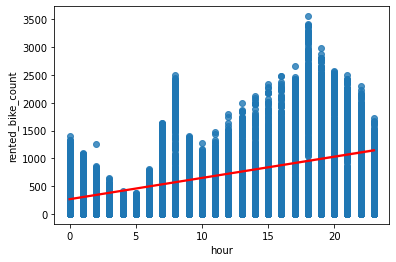

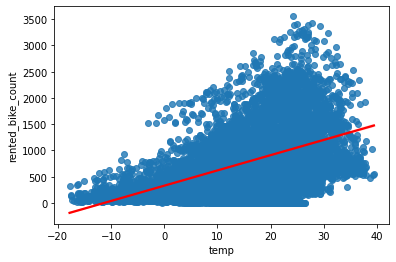

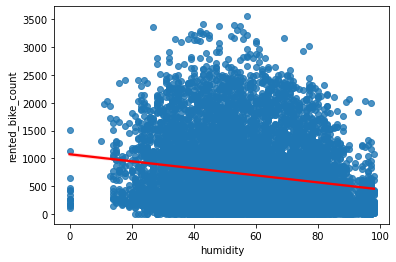

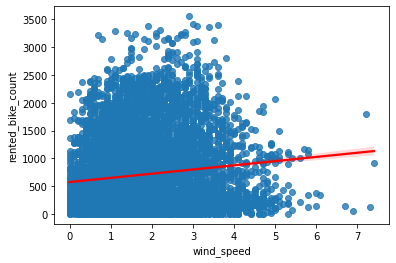

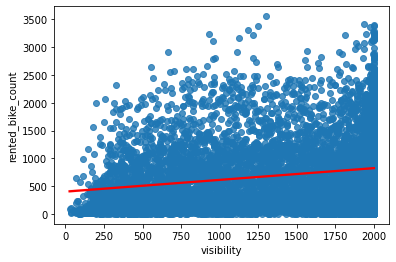

KeyError: ignored

In [ ]:
for column in ['rented_bike_count', 'hour', 'temp', 'humidity', 'wind_speed',
       'visibility', 'dew_point_temp', 'solar_radiation', 'rainfall',
       'snowfall', 'month']:
  if column == 'rented_bike_count':
    pass
  else:
    sns.regplot(x=df[column],y=df["rented_bike_count"],line_kws={"color": "r"})
  
  plt.show()

In [ ]:
df.shape

In [ ]:
df['snowfall'].value_counts()

In [ ]:
# % of entries with 0 snowfall

8317/8700*100

In [ ]:
df['rainfall'].value_counts()

In [ ]:
# % of entries with 0 rainfall

8232/8700*100

In [ ]:
df['rainfall'].value_counts()


In [ ]:
df.head()

There are approximately 95% of the entries which indicate 0 snowfall/ rainfall. To simplify our model, we can change these attributes from continuous to binary form (0 and 1) where 0 indicates that there was no snowfall/ rainfall at that particular hour, and vice versa for 1.

In [ ]:
df['snowfall'] = df['snowfall'].apply(lambda x: 0 if x==0 else 1)
df['rainfall'] = df['rainfall'].apply(lambda x: 0 if x==0 else 1)

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(df['rented_bike_count'], color="c")

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(np.sqrt(df['rented_bike_count']), color='c')

In [ ]:
sns.distplot(np.log10(df['rented_bike_count']+10),color="y")

In [ ]:
numeric_columns = ['rented_bike_count', 'hour', 'temp', 'humidity', 'wind_speed',
       'visibility', 'solar_radiation', 'rainfall', 'dew_point_temp',
       'snowfall']

In [ ]:
categorical_columns = ['holiday', 'func_day', 'seasons']

In [ ]:
for column in numeric_columns[:]:
  if column == 'rented_bike_count':
    pass
  else:
    sns.regplot(x=df[column],y=df["rented_bike_count"],line_kws={"color": "r"})
  
  plt.show()

In [ ]:
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
plt.figure(figsize=(15,8))
correlation = independent_var.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')